In [1]:
import numpy as np 
import pandas as pd 

import sklearn.model_selection as model_selection

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

#For Missing Value Treatment
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

#For Binning and creating Dummy Variables
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import KBinsDiscretizer

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from pandas import DataFrame, Series

path = '/Users/kyledoran/Downloads/'

trainData = pd.read_csv(path + 'train_NIR5Yl1.csv')
testData = pd.read_csv(path + 'test_8i3B3FC.csv')

train_copy = trainData.copy(deep=True)


In [2]:
trainData

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0
...,...,...,...,...,...,...,...
330040,339800,c,36.0,2.0,84919,1063.0,0.0
330041,253800,c,1649.0,2.0,76730,23319.0,73.0
330042,210756,c,6178.0,2.0,91701,2453.0,15.0
330043,56089,j,89.0,2.0,80245,2107.0,3.0


In [3]:
trainData.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


In [4]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          330045 non-null  int64  
 1   Tag         330045 non-null  object 
 2   Reputation  330045 non-null  float64
 3   Answers     330045 non-null  float64
 4   Username    330045 non-null  int64  
 5   Views       330045 non-null  float64
 6   Upvotes     330045 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 17.6+ MB


In [5]:
#seems like there are no null values 

In [6]:
trainData["Tag"].value_counts()

c    72458
j    72232
p    43407
i    32400
a    31695
s    23323
h    20564
o    14546
r    12442
x     6978
Name: Tag, dtype: int64

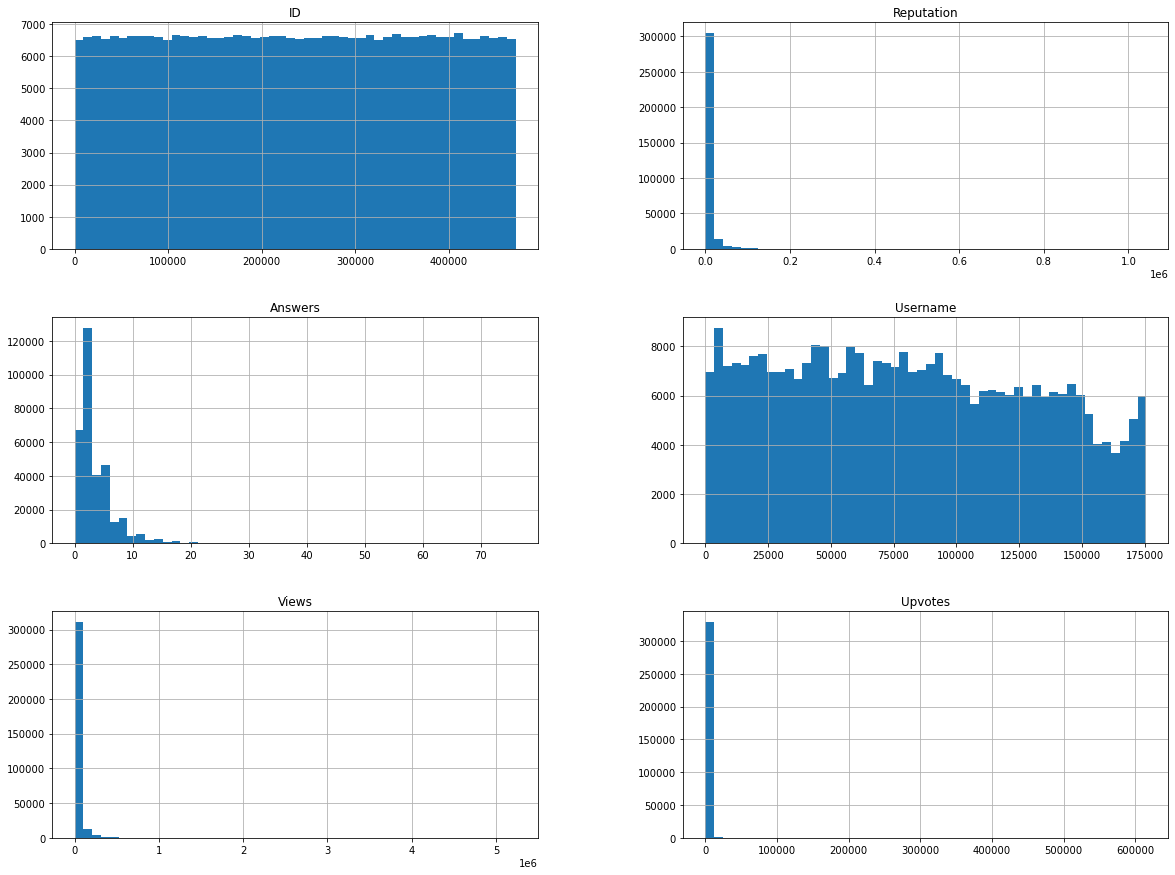

In [7]:
trainData.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
corr_matrix = trainData.corr()

In [9]:
corr_matrix["Upvotes"].sort_values(ascending=False)

Upvotes       1.000000
Views         0.437336
Reputation    0.266710
Answers       0.202033
ID            0.006328
Username     -0.011970
Name: Upvotes, dtype: float64

### Cleaning the Data

In [10]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
trainDataNoCat = trainData.drop("Tag", axis=1)
trainDataNoCat = trainDataNoCat.drop("Username", axis=1)
trainDataNoCat = trainDataNoCat.drop("ID", axis=1)
imputer.fit(trainDataNoCat)
X = imputer.transform(trainDataNoCat)
newTrainSet = pd.DataFrame(X, columns=trainDataNoCat.columns,index=trainDataNoCat.index)

In [11]:
newTrainSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Reputation  330045 non-null  float64
 1   Answers     330045 non-null  float64
 2   Views       330045 non-null  float64
 3   Upvotes     330045 non-null  float64
dtypes: float64(4)
memory usage: 10.1 MB


In [12]:
newTrainSet

,Reputation,Answers,Views,Upvotes
0,3942.0,2.0,7855.0,42.0
1,26046.0,12.0,55801.0,1175.0
2,1358.0,4.0,8067.0,60.0
3,264.0,3.0,27064.0,9.0
4,4271.0,4.0,13986.0,83.0
...,...,...,...,...
330040,36.0,2.0,1063.0,0.0
330041,1649.0,2.0,23319.0,73.0
330042,6178.0,2.0,2453.0,15.0
330043,89.0,2.0,2107.0,3.0


In [13]:
categoricalSet =  trainData[["Tag"]]
categoricalSet.head()
newTrainSet1Hot = newTrainSet.copy(deep=True)
newTrainSetOrdinal = newTrainSet.copy(deep=True)



In [14]:
newTrainSet

,Reputation,Answers,Views,Upvotes
0,3942.0,2.0,7855.0,42.0
1,26046.0,12.0,55801.0,1175.0
2,1358.0,4.0,8067.0,60.0
3,264.0,3.0,27064.0,9.0
4,4271.0,4.0,13986.0,83.0
...,...,...,...,...
330040,36.0,2.0,1063.0,0.0
330041,1649.0,2.0,23319.0,73.0
330042,6178.0,2.0,2453.0,15.0
330043,89.0,2.0,2107.0,3.0


### Ordinal encoding

In [15]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
cat_ordinal_encoded = ordinal_encoder.fit_transform(categoricalSet)
cat_ordinal_encoded[:10]

array([[0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [7.],
       [1.],
       [4.],
       [4.],
       [1.]])

In [16]:
ordinal_encoder.categories_

[array(['a', 'c', 'h', 'i', 'j', 'o', 'p', 'r', 's', 'x'], dtype=object)]

In [17]:
newTrainSetOrdinal['Tag'] = cat_ordinal_encoded

In [18]:
newTrainSetOrdinal

,Reputation,Answers,Views,Upvotes,Tag
0,3942.0,2.0,7855.0,42.0,0.0
1,26046.0,12.0,55801.0,1175.0,0.0
2,1358.0,4.0,8067.0,60.0,1.0
3,264.0,3.0,27064.0,9.0,0.0
4,4271.0,4.0,13986.0,83.0,1.0
...,...,...,...,...,...
330040,36.0,2.0,1063.0,0.0,1.0
330041,1649.0,2.0,23319.0,73.0,1.0
330042,6178.0,2.0,2453.0,15.0,1.0
330043,89.0,2.0,2107.0,3.0,4.0


### One Hot Encoding

In [19]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

encoder_df = pd.DataFrame(cat_encoder.fit_transform(categoricalSet).toarray())
hotencoded_df = newTrainSet.join(encoder_df)

In [20]:

hotencoded_df

,Reputation,Answers,Views,Upvotes,0,1,2,3,4,5,6,7,8,9
0,3942.0,2.0,7855.0,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,26046.0,12.0,55801.0,1175.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1358.0,4.0,8067.0,60.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,264.0,3.0,27064.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4271.0,4.0,13986.0,83.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330040,36.0,2.0,1063.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
330041,1649.0,2.0,23319.0,73.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
330042,6178.0,2.0,2453.0,15.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
330043,89.0,2.0,2107.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Custom Transformer

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin

reputation_ix, answers_ix, views_ix = 0, 1, 2 

class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, add_views_per_answer=True): # no *args or **kargs
        self.add_views_per_answer = add_views_per_answer
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        
        views_rep_ratio = X[:, reputation_ix] / X[:, views_ix]
        if self.add_views_per_answer:
            add_views_per_answer = X[:, answers_ix] / X[:, views_ix]
            return np.c_[X, add_views_per_answer, views_rep_ratio]

        else:
            return np.c_[X, views_rep_ratio]

In [22]:
new_attributes = CustomTransformer(add_views_per_answer=False)
trainData_new_attribs = new_attributes.transform(newTrainSet.values)

In [23]:
trainData_new_attribs

array([[3.94200000e+03, 2.00000000e+00, 7.85500000e+03, 4.20000000e+01,
        5.01845958e-01],
       [2.60460000e+04, 1.20000000e+01, 5.58010000e+04, 1.17500000e+03,
        4.66765829e-01],
       [1.35800000e+03, 4.00000000e+00, 8.06700000e+03, 6.00000000e+01,
        1.68340151e-01],
       ...,
       [6.17800000e+03, 2.00000000e+00, 2.45300000e+03, 1.50000000e+01,
        2.51854872e+00],
       [8.90000000e+01, 2.00000000e+00, 2.10700000e+03, 3.00000000e+00,
        4.22401519e-02],
       [2.00100000e+03, 4.00000000e+00, 2.55400000e+03, 3.70000000e+01,
        7.83476899e-01]])

### Num pipeline using standarization 

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CustomTransformer()),
        ('std_scaler', StandardScaler()),
    ])

num_train_set = num_pipeline.fit_transform(newTrainSet)

In [25]:
num_train_set

array([[-0.14157253, -0.53573597, -0.26915833, -0.08225766, -0.25944057,
        -0.07172108],
       [ 0.67523751,  2.25794312,  0.32308687,  0.23312725, -0.26804198,
        -0.07249482],
       [-0.23705919,  0.02299985, -0.26653963, -0.07724713, -0.20699675,
        -0.079077  ],
       ...,
       [-0.05894553, -0.53573597, -0.33588566, -0.08977345, -0.13754174,
        -0.02723997],
       [-0.2839526 , -0.53573597, -0.34015957, -0.09311381, -0.10843438,
        -0.08185831],
       [-0.21329838,  0.02299985, -0.33463807, -0.08364947,  0.02569112,
        -0.06550933]])

In [26]:
newTrainSet.drop('Upvotes', axis=1, inplace=True)
newTrainSet

,Reputation,Answers,Views
0,3942.0,2.0,7855.0
1,26046.0,12.0,55801.0
2,1358.0,4.0,8067.0
3,264.0,3.0,27064.0
4,4271.0,4.0,13986.0
...,...,...,...
330040,36.0,2.0,1063.0
330041,1649.0,2.0,23319.0
330042,6178.0,2.0,2453.0
330043,89.0,2.0,2107.0


### Creating test set where all tags are present

In [27]:
tag = trainData.loc[trainData['Tag'] == 'a']
test_df = pd.DataFrame(tag.iloc[0])
test_df.transpose()
tag = trainData.loc[trainData['Tag'] == 'c']
test_df1 = pd.DataFrame(tag.iloc[0])
test_df1.transpose()
tag = trainData.loc[trainData['Tag'] == 'h']
test_df2 = pd.DataFrame(tag.iloc[0])
test_df2.transpose()
tag = trainData.loc[trainData['Tag'] == 'i']
test_df3 = pd.DataFrame(tag.iloc[0])
test_df3.transpose()
tag = trainData.loc[trainData['Tag'] == 'j']
test_df4 = pd.DataFrame(tag.iloc[0])
test_df4.transpose()
tag = trainData.loc[trainData['Tag'] == 'o']
test_df5 = pd.DataFrame(tag.iloc[0])
test_df5.transpose()
tag = trainData.loc[trainData['Tag'] == 'p']
test_df6 = pd.DataFrame(tag.iloc[0])
test_df6.transpose()
tag = trainData.loc[trainData['Tag'] == 'r']
test_df7 = pd.DataFrame(tag.iloc[0])
test_df7.transpose()
tag = trainData.loc[trainData['Tag'] == 's']
test_df8 = pd.DataFrame(tag.iloc[0])
test_df8.transpose()
tag = trainData.loc[trainData['Tag'] == 'x']
test_df9 = pd.DataFrame(tag.iloc[0])
test_df9.transpose()

sampleDF = pd.concat([test_df, test_df1, test_df2, test_df3, test_df4, test_df5, test_df6, test_df7, test_df8, test_df9], axis=1)
sampleDF = sampleDF.transpose()
sampleDF


train_set_copy_labels = trainData["Upvotes"].copy()
trainData.drop('Upvotes', axis=1, inplace=True)

### Full Pipeline

In [28]:
from sklearn.compose import ColumnTransformer

num_attribs = list(newTrainSet)
print(num_attribs)
cat_attribs = ["Tag"]


full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
        ],
        remainder = 'drop'
)

upvotes_prepared = full_pipeline.fit_transform(trainData)

['Reputation', 'Answers', 'Views']


In [29]:
upvotes_prepared

array([[-0.14157253, -0.53573597, -0.26915833, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.67523751,  2.25794312,  0.32308687, ...,  0.        ,
         0.        ,  0.        ],
       [-0.23705919,  0.02299985, -0.26653963, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.05894553, -0.53573597, -0.33588566, ...,  0.        ,
         0.        ,  0.        ],
       [-0.2839526 , -0.53573597, -0.34015957, ...,  0.        ,
         0.        ,  0.        ],
       [-0.21329838,  0.02299985, -0.33463807, ...,  0.        ,
         0.        ,  0.        ]])

In [30]:
newest_df = pd.DataFrame(upvotes_prepared)

In [31]:
newest_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.141573,-0.535736,-0.269158,-0.259441,-0.071721,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.675238,2.257943,0.323087,-0.268042,-0.072495,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.237059,0.023000,-0.266540,-0.206997,-0.079077,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.277486,-0.256368,-0.031882,-0.290695,-0.082575,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.129415,0.023000,-0.193426,-0.252617,-0.076054,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330040,-0.285911,-0.535736,-0.353055,0.094237,-0.082043,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
330041,-0.226306,-0.535736,-0.078142,-0.296148,-0.081230,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
330042,-0.058946,-0.535736,-0.335886,-0.137542,-0.027240,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
330043,-0.283953,-0.535736,-0.340160,-0.108434,-0.081858,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Linear regression

In [32]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(newest_df, train_set_copy_labels)

LinearRegression()

In [33]:
some_data = sampleDF
some_labels = sampleDF["Upvotes"]
some_data.drop('Upvotes', axis=1, inplace=True)
some_data_prepared = full_pipeline.fit_transform(some_data)
some_data_prepared
prepared_df = pd.DataFrame(some_data_prepared)
prepared_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.926773,-0.160128,0.158086,-0.501133,-0.260723,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.144957,1.441153,0.202765,-0.381072,-0.418491,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.917847,-0.960769,-1.441317,1.243202,0.202570,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.647656,1.441153,-0.312525,-0.273746,-0.436616,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.585440,-0.160128,-1.431623,2.562537,2.942159,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,1.162702,-0.160128,-0.321588,-0.449436,-0.244680,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.813940,-0.960769,0.206770,-0.566305,-0.348708,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,-0.880966,-0.960769,-0.322009,-0.538614,-0.460803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,-0.759901,1.441153,1.896164,-0.504218,-0.480762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,-1.137527,-0.960769,1.365278,-0.591214,-0.493946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [34]:
print("Predictions:", lin_reg.predict(some_data_prepared))
print(some_labels)

Predictions: [ 2583.8584022    345.24300449 -2713.55294669  -788.64781525
 -1987.7633799   1181.87430222  1652.79171101  -754.59010515
  2507.84758472  1693.67161315]
0     42.0
2     60.0
13     2.0
16    13.0
7      3.0
14    10.0
11    42.0
5      4.0
12    19.0
67    60.0
Name: Upvotes, dtype: object


In [35]:
tag = trainData.loc[trainData['Tag'] == 'c']
test_df.append(list((tag.iloc[0])))
test_df.transpose()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0


In [36]:
train_copy

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0
...,...,...,...,...,...,...,...
330040,339800,c,36.0,2.0,84919,1063.0,0.0
330041,253800,c,1649.0,2.0,76730,23319.0,73.0
330042,210756,c,6178.0,2.0,91701,2453.0,15.0
330043,56089,j,89.0,2.0,80245,2107.0,3.0


### Evaluating using test data

In [37]:
y = train_copy['Upvotes']
X = train_copy.drop(['ID','Upvotes','Username'], axis = 1)


In [38]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2, random_state = 200)


### Creating pipeline that does everything from data transformation and prediction

In [39]:
regModel = make_pipeline(full_pipeline, LinearRegression())


In [ ]:
regModel.fit(X_train, y_train)

### using RMSE and score metric to evaluate performance

In [ ]:
train_score = regModel.score(X_train,y_train)
test_score = regModel.score(X_test,y_test)

print(f'Train Accuracy : {train_score:.3f}')
print(f'Test Accuracy : {test_score:.3f}')

In [ ]:
y_pred = regModel.predict(X_test)
print(f'RMSE : {np.sqrt(mean_squared_error(y_test, y_pred)):.0f}')